# PyTorch로 XOR 문제 해결하기

이 노트북에서는 PyTorch를 사용하여 가장 기본적인 딥러닝 문제인 XOR 분류 문제를 해결해 봅니다.
XOR 문제는 두 입력이 다를 때만 1을 출력하고, 같으면 0을 출력하는 문제입니다.
단층 퍼셉트론으로는 해결할 수 없으며, 다층 퍼셉트론(MLP)이 필요합니다.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 재현성을 위한 시드 설정
torch.manual_seed(42)

## 1. 데이터 정의

XOR 연산의 입력과 정답(Label)을 정의합니다.
- 입력: (0,0), (0,1), (1,0), (1,1)
- 출력: 0, 1, 1, 0

In [10]:
# 입력 데이터 (4개의 샘플, 2개의 특성)
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])

# 정답 데이터 (4개의 샘플, 1개의 클래스)
y = torch.FloatTensor([[0], [1], [1], [0]])

print("입력 데이터 shape:", X.shape)
print("정답 데이터 shape:", y.shape)

입력 데이터 shape: torch.Size([4, 2])
정답 데이터 shape: torch.Size([4, 1])


## 2. 모델 정의 (Multi-Layer Perceptron)

입력층, 은닉층, 출력층으로 구성된 신경망을 정의합니다.
- 입력층: 2개 노드 (입력 특성 개수)
- 은닉층: 4개 노드 (임의 설정)
- 출력층: 1개 노드 (0 또는 1 분류)

In [11]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # 첫 번째 선형 레이어 (입력 2 -> 은닉 4)
        self.linear1 = nn.Linear(2, 4)
        # 활성화 함수 (Sigmoid)
        self.sigmoid = nn.Sigmoid()
        # 두 번째 선형 레이어 (은닉 4 -> 출력 1)
        self.linear2 = nn.Linear(4, 1)

    def forward(self, x):
        # 입력 -> 은닉층 -> 활성화 함수
        x = self.linear1(x)
        x = self.sigmoid(x)
        # 은닉층 -> 출력층 -> 활성화 함수
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

# 모델 초기화
model = XORModel()
print(model)

XORModel(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


## 3. 학습 설정

- 손실 함수(Loss Function): 이진 분류이므로 Binary Cross Entropy Loss를 사용합니다.
- 최적화(Optimizer): SGD(Stochastic Gradient Descent)를 사용합니다.

In [12]:
# 손실 함수 정의 (Binary Cross Entropy)
criterion = nn.BCELoss()

# 최적화 함수 정의 (학습률 0.1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4. 모델 학습

10,000번의 에폭(Epoch) 동안 학습을 진행합니다.
각 에폭마다 Loss와 Accuracy를 기록하여 나중에 시각화합니다.

In [13]:
# 학습 횟수 설정
epochs = 10000

# 시각화를 위한 리스트
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # 1. Forward Pass (순전파): 모델에 입력을 넣어 예측값을 계산
    outputs = model(X)
    
    # 2. Loss Calculation (손실 계산): 예측값과 정답의 차이 계산
    loss = criterion(outputs, y)
    
    # 3. Backward Pass (역전파): 기울기(Gradient) 계산
    optimizer.zero_grad() # 이전 기울기 초기화
    loss.backward()       # 기울기 계산
    
    # 4. Optimizer Step (가중치 업데이트)
    optimizer.step()
    
    # --- 기록 및 출력 ---
    # 정확도 계산 (0.5 이상이면 1, 아니면 0)
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y).float().mean()
    
    # 기록 저장
    loss_history.append(loss.item())
    accuracy_history.append(accuracy.item())
    
    # 1000번마다 로그 출력
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

Epoch [1000/10000], Loss: 0.6902, Accuracy: 0.5000
Epoch [2000/10000], Loss: 0.6711, Accuracy: 0.5000
Epoch [3000/10000], Loss: 0.5573, Accuracy: 0.7500
Epoch [4000/10000], Loss: 0.3516, Accuracy: 1.0000
Epoch [5000/10000], Loss: 0.1296, Accuracy: 1.0000
Epoch [6000/10000], Loss: 0.0588, Accuracy: 1.0000
Epoch [7000/10000], Loss: 0.0352, Accuracy: 1.0000
Epoch [8000/10000], Loss: 0.0244, Accuracy: 1.0000
Epoch [9000/10000], Loss: 0.0184, Accuracy: 1.0000
Epoch [10000/10000], Loss: 0.0147, Accuracy: 1.0000


## 5. 결과 시각화

학습 과정에서의 Loss 감소와 Accuracy 증가 추이를 그래프로 확인합니다.

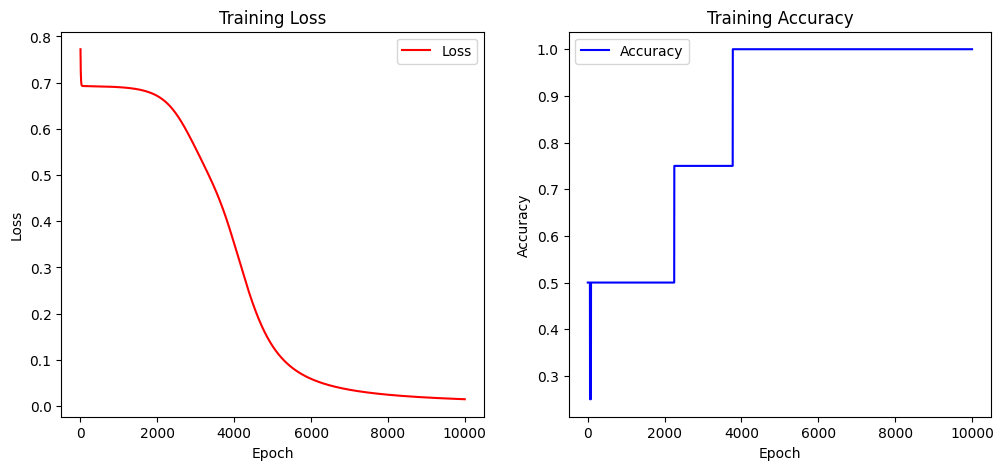

In [14]:
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 6. 최종 예측 확인

학습된 모델이 XOR 문제를 잘 해결하는지 확인합니다.

In [15]:
# 평가 모드로 전환 (여기서는 단순해서 큰 차이 없으나 습관화)
model.eval()

with torch.no_grad():
    test_outputs = model(X)
    predicted = (test_outputs > 0.5).float()
    
    print("입력값 (Input):")
    print(X.numpy())
    print("\n예측값 (Predicted):")
    print(predicted.numpy())
    print("\n정답 (Target):")
    print(y.numpy())

입력값 (Input):
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

예측값 (Predicted):
[[0.]
 [1.]
 [1.]
 [0.]]

정답 (Target):
[[0.]
 [1.]
 [1.]
 [0.]]
